## VK Network Analysis

### Getting access to VK API

In case of `ImportError` with `vk` package: go to _Python\Lib\site-packages\vk\utils.py_ and replace `collections` to `collectiobs.abc` (py 3.9+, src: [stack overflow](https://ru.stackoverflow.com/questions/1389580/importerror-cannot-import-name-iterable-from-collections))

In [43]:
# !pip install vk

In [44]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import numpy as np
import math
import time
import vk

How to: get [VK API token](https://dvmn.org/encyclopedia/qna/63/kak-poluchit-token-polzovatelja-dlja-vkontakte/)  
1. creat new standalone [app](https://vk.com/apps?act=manage)
2. go back to MyApps menu and press <ins>Manage</ins> button
3. copy `id` part of new url (e.g. /editapp?id=<ins>42</ins>)
4. paste it here after `client_id` and change `v` to latest [api version](https://vk.com/dev/versions): https://oauth.vk.com/authorize?client_id=42&display=page&scope=friends&response_type=token&v=5.131&state=123456
5. copy url after redirecting. it will contain your `access_token` (exp. in 1 day).

In [45]:
token = '08e9f4d5b9d4c13d5dd4e8729091fcd27fda350440cf01af2870b634b8eda6c3b307cc1963753a0bd26ac'
version = 5.131
api = vk.API(access_token=token, v=version) 

# alternative:
# session = vk.AuthSession(app_id='appid', user_login='jake@gmail.com', user_password='Finn')
# api = vk.API(session)

*The code below is most likely a far from ideal implementation of parsing a list of friends via ***VK API***. If you have any ideas on how it can be optimized - I will be grateful.*

In [46]:
# WARNING! **1.5h** execution chunk

# dict_users_requests = {}
# results = []

# for friend in friends_ids_list:
#   dict_results = {}
#   dict_users_requests = {}
#   for column in fields_name:
#     try:
#       dict_results = {column: 
#                       api.users.get(user_ids = friend,
#                       v = version,
#                       fields = fields_name)[0][column]
#                       }
#     except:
#       dict_results = {column: np.nan}
#     finally:
#       print(dict_results)
#       dict_users_requests.update(dict_results)
#     time.sleep(1)
#   results.append(dict_users_requests)

# df = pd.DataFrame(results)
# df.to_csv('vk_friends.csv', index=False)
df = pd.read_csv('vk_friends.csv')
df.head()

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,0,Igor,Ryabov,1332226,2,27.8.1986,"{'id': 1, 'title': 'Russia'}",Новороссийск,1.0,226.0,...,Jungle is Massive! 🦍,0.0,"[{'city': 1, 'country': 1, 'id': 661, 'name': ...",NaN,NaN,"{'albums': 14, 'audios': 427, 'followers': 226...",1,"{'id': 49673019, 'name': 'Москва FM', 'type': ...",https://www.facebook.com/igor.ryabov.50,all
1,1,Tanya,Titova,2264271,1,25.9,"{'id': 1, 'title': 'Russia'}",NaN,1.0,914.0,...,Портреты • Шаржи • Скетчинг • Мастер-классы • ...,0.0,"[{'chair': 2732, 'chair_name': ' Кафедра графи...",NaN,NaN,"{'albums': 1, 'audios': 5229, 'followers': 914...",1,"{'id': 961, 'name': 'ВШПМ СПбГУПТД (бывш. СЗИП...",NaN,all
2,2,Nadi,Zvonova,2464009,1,1.6,"{'id': 1, 'title': 'Russia'}",Питер,1.0,168.0,...,NaN,0.0,"[{'city': 2, 'country': 1, 'education_form': '...",NaN,NaN,"{'albums': 8, 'audios': 0, 'followers': 168, '...",1,"{'id': 1173072, 'name': 'СПбГЭУ', 'type': 'uni...",https://www.flickr.com/photos/nadi-z4/,all
3,3,Tanya,Adamenko,2518040,1,NaN,NaN,Санкт-Петербург,1.0,NaN,...,"All squares are rhombuses, but not all rhombus...",0.0,"[{'chair': 1842936, 'chair_name': ' Кафедра го...",NaN,NaN,"{'albums': 3, 'audios': 1065, 'friends': 1437,...",1,"{'id': 17, 'name': 'НИУ ВШЭ (СПб)', 'type': 'u...",https://twitter.com/eta_mim,owner
4,4,Ksenia,Serebrova,3056955,1,5.6.1967,"{'id': 1, 'title': 'Russia'}",Санкт-Петербург,1.0,139.0,...,NaN,4.0,"[{'city': 2, 'country': 1, 'education_form': '...",NaN,NaN,"{'albums': 66, 'audios': 33, 'followers': 139,...",1,"{'id': 34, 'name': 'РГПУ им. А. И. Герцена', '...",NaN,all


### Exploratory Data Analysis (+Data Cleaning)

According to pieplot below, in VK I have more connections with girls rather than with boys:

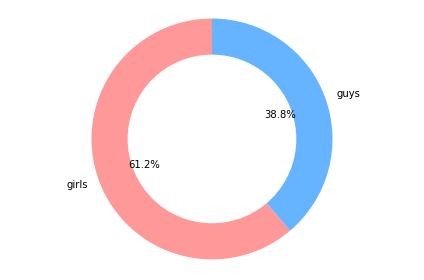

In [47]:
# Pie chart
labels = ['girls', 'guys']
sizes = df.groupby(['sex']).size()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

I wanted to plot the distribution of cities of occupation, but it wont be representative as 60% of my freinds are living in St Petersburg (and no more than 2 firends outside of two capital cities). Same with countries (obviously because city parameter had unique country parent. Moreover, VK prevalent on CIS region only).

In [48]:
import ast
for i, row in df.iterrows():
    city_val = row['city']
    if type(city_val) is str:
        if '{' in city_val:
            city_val = ast.literal_eval(city_val)['title']
    df.at[i,'city'] = city_val

cities = df.groupby(['city']).size().sort_values(ascending = False).head(7)
cities

city
Saint Petersburg    98
Moscow              11
Minsk                2
Chitungwiza          1
Copenhagen           1
Delft                1
Espoo                1
dtype: int64

In [49]:
for i, row in df.iterrows():
    country_val = row['country']
    if type(country_val) is str:
        if '{' in country_val:
            country_val = ast.literal_eval(country_val)['title']
    df.at[i,'country'] = country_val

countries = df.groupby(['country']).size().sort_values(ascending = False).head(7)
countries

country
Russia            129
Belarus             3
Germany             2
Czech Republic      1
Denmark             1
Finland             1
India               1
dtype: int64

Instead, I desided to plot the distribution of Zodiac signs over my friendlist:

In [50]:
import re

# extract dates and monthes only via RexExp
for i, row in df.iterrows():
    bdate_val = row['bdate']
    if type(bdate_val) is str:
        day = re.search(r'^[^.]+', bdate_val)
        day = day.group(0)
        month = re.search(r'(?<=..)[^.]+', bdate_val)
        month = month.group(0)
        df.at[i,'day'] = int(day)
        df.at[i,'month'] = int(month)    

for i, row in df.iterrows():
    day = row['day']
    month = row['month']
    if month == 12:
        df.at[i,'zodiac'] = 'Sagittarius' if (day < 22) else 'Capricorn'
    elif month == 1:
        df.at[i,'zodiac'] = 'Capricorn' if (day < 20) else 'Aquarius'
    elif month == 2:
        df.at[i,'zodiac'] = 'Aquarius' if (day < 19) else 'Pisces'
    elif month == 3:
        df.at[i,'zodiac'] = 'Pisces' if (day < 21) else 'Aries'
    elif month == 4:
        df.at[i,'zodiac'] = 'Aries' if (day < 20) else 'Taurus'
    elif month == 5:
        df.at[i,'zodiac'] = 'Taurus' if (day < 21) else 'Gemini'
    elif month == 6:
        df.at[i,'zodiac'] = 'Gemini' if (day < 21) else 'Cancer'
    elif month == 7:
        df.at[i,'zodiac'] = 'Cancer' if (day < 23) else 'Leo'
    elif month == 8:
        df.at[i,'zodiac'] = 'Leo' if (day < 23) else 'Virgo'
    elif month == 9:
        df.at[i,'zodiac'] = 'Virgo' if (day < 23) else 'Libra'
    elif month == 10:
        df.at[i,'zodiac'] = 'Libra' if (day < 23) else 'Scorpio'
    elif month == 11:
        df.at[i,'zodiac'] = 'Scorpio' if (day < 22) else 'Sagittarius' 


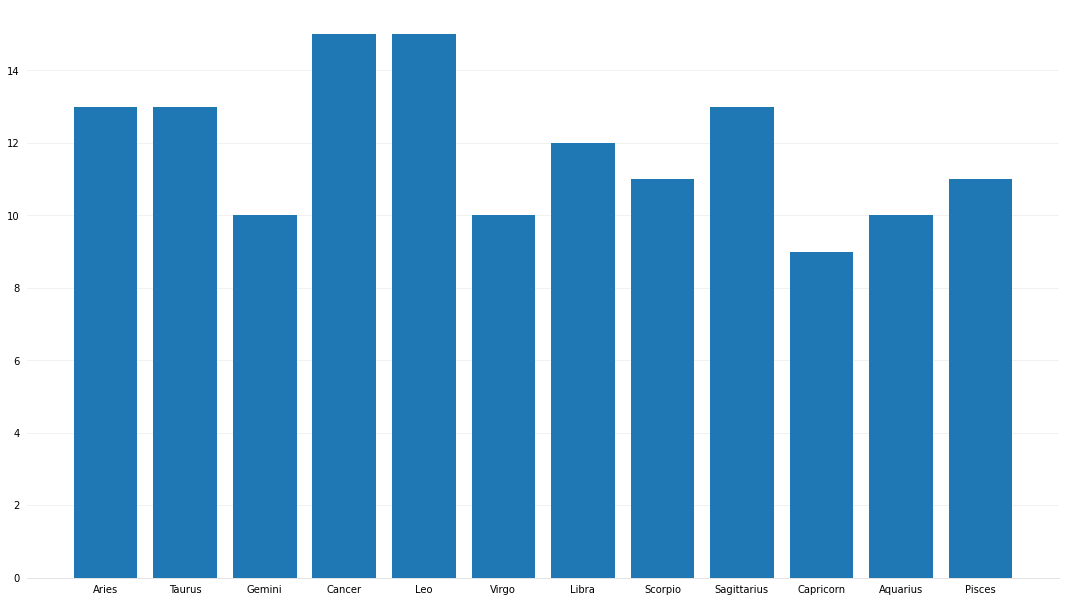

In [51]:
nan_value = float("NaN")
zodiac_order = ["Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo", "Libra", "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"]

astro_sign = df.zodiac.replace(r'^\s*$', np.nan, regex=True)
astro_sign = astro_sign.dropna()
astro_sign = df.groupby(['zodiac']).size().loc[zodiac_order].to_frame()
astro_sign.columns = ['counter']
astro_sign['zodiac'] = astro_sign.index

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)


ax.bar(
    x=astro_sign.zodiac,
    height=astro_sign.counter
)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



It's turned out that Cancer is one of the most frequent Zodiacs in my firendslist. I always thought I am the only one here.

Universities distributions show that I tend to create connections with my alma mater's students.

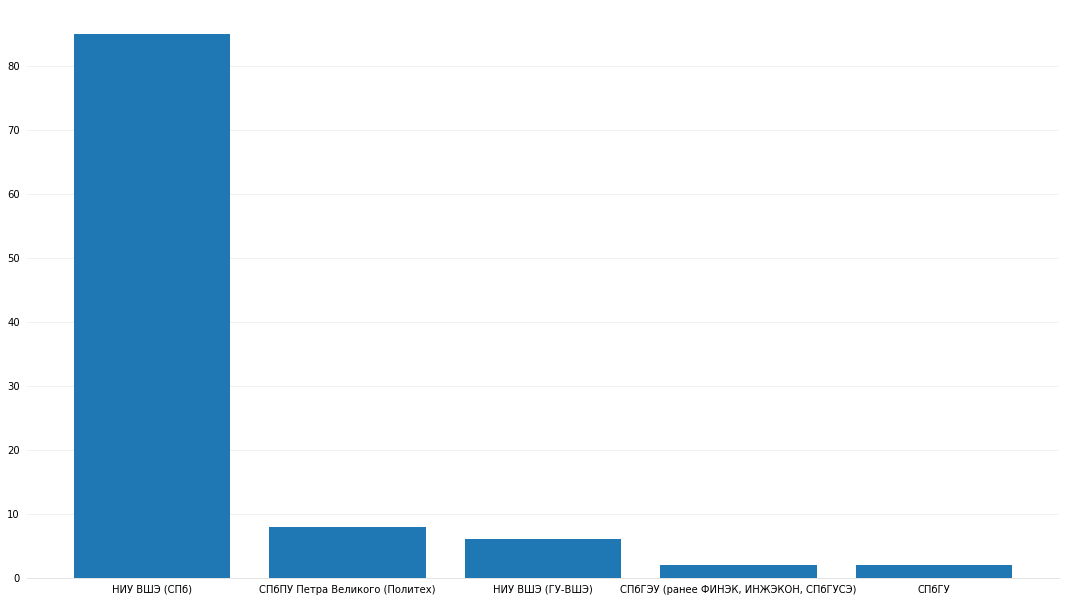

In [52]:
for i, row in df.iterrows():
    uni_val = row['universities']
    if type(uni_val) is str:
        if '{' in uni_val:
            uni_val = ast.literal_eval(uni_val)[0]['name']
    df.at[i,'universities'] = uni_val

uni = df.groupby(['universities']).size().sort_values(ascending = False).to_frame()
uni.columns = ['counter']
uni['university'] = uni.index
uni = uni.drop(['[]']).head()

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)

ax.bar(
    x=uni.university,
    height=uni.counter
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

### Network Visualization

Now let's create my friends network, starting with edgelist:

In [53]:
# # WARNING: 3 min execution chunk

# # getting pairs of MutualFriends connections 
# myDict = {"target": [], "commons": []}
# my_id = 436278249 # https://vk.com/settings -> Profile URL
# friends_ids_list = df[df['deactivated'].isna()].id #clear deleted accounts

# for friend in friends_ids_list:
#     wtf = api.friends.getMutual(source_uid = my_id,
#                             v = version,
#                             target_uids = friend,
#                             fields = ['first_name','last_name'])[0]['common_friends']
#     for i in wtf:
#         myDict["target"].append(friend)
#         myDict["commons"].append(i)
#     time.sleep(1)

# lol = pd.DataFrame.from_dict(myDict)

# # dropping reversed duplicates
# lol = pd.DataFrame(np.sort(lol.values, axis=1), columns=lol.columns).drop_duplicates()

# # adding names 
# map_dict = dict(zip(df.id,df.first_name+' '+df.last_name))
# lol['pers1'] = lol['target'].explode().map(map_dict).groupby(level=0).agg(list)
# lol['pers2'] = lol['commons'].explode().map(map_dict).groupby(level=0).agg(list)

# for i, row in lol.iterrows():
#     lol.at[i,'pers1'] = row['pers1'][0]
#     lol.at[i,'pers2'] = row['pers2'][0]

# # save results
# lol.to_csv('edges.csv', index=False)

lol = pd.read_csv('edges.csv')
lol = lol.dropna()

Visualizations:

In [54]:
# !pip install pyvis

In [55]:
import networkx as nx
from pyvis.network import Network

# Convert your dataframe to graph
nxg = nx.from_pandas_edgelist(lol, 'pers1', 'pers2', edge_attr=None)

# nodes size
scale=10
d = nx.betweenness_centrality(nxg)
d.update((x, (y+1.1)**scale*5+10) for x, y in d.items())
nx.set_node_attributes(nxg,d,'size')

nt = Network(notebook=True, width='100%')
nt.barnes_hut()

neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nt.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

nt.from_nx(nxg)
nt.show('firends.html')

### Community Detection

Afterall, we can build communities on this graph for more visibility.  

There are two main types of community detection techniques, **agglomerative** and **divisive**.

**Agglomerative methods** generally start with a network that contains only nodes of the original graph. The edges are added one-by-one to the graph, while stronger edges are prioritized over weaker ones. The strength of an edge, or weight, is calculated differently depending on the specific algorithm implementation.

On the other hand, **divisive methods** rely on the process of removing edges from the original graph iteratively. Stronger edges are removed before weaker ones. At every step, the edge-weight calculation is repeated, since the weight of the remaining edges changes after an edge is removed. After a certain number of steps, we get clusters of densely connected nodes, a.k.a. communities.

#### Girvan-Newman

The Girvan-Newman Algorithm has detected 3 different clusters over my network.

***[How does it work?](https://networkx.guide/algorithms/community-detection/girvan-newman)*** The Girvan-Newman algorithm can be divided into four main steps:

1. For every edge in a graph, calculate the edge betweenness centrality.  
2. Remove the edge with the highest betweenness centrality.  
3. Calculate the betweenness centrality for every remaining edge.  
4. Repeat steps 2–4 until there are no more edges left.  

In [56]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(nxg)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

len(node_groups)

3

In [57]:
# nodes size
scale=10
d = nx.betweenness_centrality(nxg)
d.update((x, (y+1.1)**scale*5+10) for x, y in d.items())
nx.set_node_attributes(nxg,d,'size')

nt = Network(notebook=True, width='100%')
nt.repulsion()

neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nt.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])
    for x in range(len(node_groups)):
        try: 
            idx = node_groups[x].index(nt.nodes['id'])
            node['group'] = x
        except ValueError: 
            pass

options = {
  "physics": {
    "repulsion": {
      "centralGravity": 1.1,
      "springLength": 145,
      "springConstant": 0.025,
      "nodeDistance": 165
    },
    "maxVelocity": 38,
    "minVelocity": 1,
    "solver": "repulsion",
    "wind": {
      "x": 0.1,
      "y": 0.2
    }
  },
  "interaction": {
    "selectConnectedEdges": True
  },
  "Layout": {
    "set_edge_minimization": True
  },
  "edges": {
    "color": {
      "opacity": 0.4
    }}}

nt.options=options

nt.from_nx(nxg)
nt.show('firends_girvan_newman.html')

In [58]:
# # network bebugging
# nt = Network(height='100%', width='60%')
# nt.from_nx(nxg)
# nt.show_buttons(filter_=['edges']) # physics, nodes, Layout
# nt.show('firends.html')

I've choose this method, because I used betweenness centrality metric during node's size setting. However, I don't like the result: it clustered almost each of my peer to a single homogeneous group. Let's try [different algorithms](https://networkx.org/documentation/stable/reference/algorithms/community.html) (sadly, this is the only one method based on centrality metrics):

#### Louvain Community Detection Algorithm

Louvain Community Detection Algorithm is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization.

The algorithm works in 2 steps. On the first step it assigns every node to be in its own community and then for each node it tries to find the maximum positive modularity gain by moving each node to all of its neighbor communities. If no positive gain is achieved the node remains in its original community.

In [59]:
from networkx.algorithms.community import louvain_communities
communities = louvain_communities(nxg, seed=42)
print("Number of communitites:", len(communities))

Number of communitites: 6


In [60]:
# loading data
nxg = nx.from_pandas_edgelist(lol, 'pers1', 'pers2', edge_attr=None)

# nodes size
scale=10
d = nx.betweenness_centrality(nxg)
d.update((x, (y+1.1)**scale*5+10) for x, y in d.items())
nx.set_node_attributes(nxg,d,'size')

nt = Network(notebook=True, width='100%')
nt.repulsion()

neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nxg.nodes:
    # nxg.nodes[node]['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node])
    # nxg.nodes[node]['value'] = len(neighbor_map[node])
    for x in range(len(communities)):
        try: 
            idx = list(communities[x]).index(node)
            nxg.nodes[node]['group'] = x
        except ValueError: 
            pass

options = {
  "physics": {
    "repulsion": {
      "centralGravity": 1.1,
      "springLength": 145,
      "springConstant": 0.025,
      "nodeDistance": 165
    },
    "maxVelocity": 38,
    "minVelocity": 1,
    "solver": "repulsion",
    "wind": {
      "x": 0.1,
      "y": 0.2
    }
  },
  "interaction": {
    "selectConnectedEdges": True
  },
  "Layout": {
    "set_edge_minimization": True
  },
  "edges": {
    "color": {
      "opacity": 0.4
    }}}

nt.options=options
nt.from_nx(nxg)
nt.show('firends_louvain_communities.html')

Here we got an advanced community detection results, where I can derive subgroups between all universities fellows depending on our mutual friends. Let's try another one:

#### K-clique communities

A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.

In [61]:
from networkx.algorithms.community import k_clique_communities
communities = list(k_clique_communities(nxg, 3)) # according to previous graphs, size of the smallest cluster is 3
print("Number of communitites:", len(communities))

Number of communitites: 5


In [62]:
# loading data
nxg = nx.from_pandas_edgelist(lol, 'pers1', 'pers2', edge_attr=None)

# nodes size
scale=10
d = nx.betweenness_centrality(nxg)
d.update((x, (y+1.1)**scale*5+10) for x, y in d.items())
nx.set_node_attributes(nxg,d,'size')

nt = Network(notebook=True, width='100%')
nt.repulsion()

neighbor_map = nt.get_adj_list()

# add neighbor data to node hover data
for node in nxg.nodes:
    # nxg.nodes[node]['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node])
    # nxg.nodes[node]['value'] = len(neighbor_map[node])
    for x in range(len(communities)):
        try: 
            idx = list(communities[x]).index(node)
            nxg.nodes[node]['group'] = x
        except ValueError: 
            pass

options = {
  "physics": {
    "repulsion": {
      "centralGravity": 1.1,
      "springLength": 145,
      "springConstant": 0.025,
      "nodeDistance": 165
    },
    "maxVelocity": 38,
    "minVelocity": 1,
    "solver": "repulsion",
    "wind": {
      "x": 0.1,
      "y": 0.2
    }
  },
  "interaction": {
    "selectConnectedEdges": True
  },
  "Layout": {
    "set_edge_minimization": True
  },
  "edges": {
    "color": {
      "opacity": 0.4
    }}}

nt.options=options
nt.from_nx(nxg)
nt.show('firends_k_clique.html')

This method showed the worst results. He formed mini-clusters, people in which were not connected in any way (I know this for sure). It seems that this method is not suitable for analyzing friends from social networks: most of them are within one or two handshakes from each other, and therefore it also does not distinguish between homogeneous clusters, while finding connections where there are none.

As the result, ***Louvain Community Detection Algorithm*** performed better than others on my network.

In [63]:
%reset -f # to clear variables

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  to, please run `%reset?` for details
Don't know how to reset  clear, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details
